In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras import Sequential, layers, optimizers, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
bolaBasket = pd.read_csv('all_seasons.csv', sep=";")
bolaBasket

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,9.979.024,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,11.793.392,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,9.525.432,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697.424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,10.886.208,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,6895,Robin Lopez,PHX,24.0,213.36,11.566.596.000.000.000,Stanford,USA,2008,1,...,5.4,3.3,0.3,-3.5,0.110,0.152,0.190,0.526,0.039,2011-12
6896,6896,Rajon Rondo,BOS,26.0,185.42,84.368.112,Kentucky,USA,2006,1,...,11.9,4.8,11.7,5.2,0.039,0.111,0.203,0.483,0.498,2011-12
6897,6897,Rodney Stuckey,DET,26.0,195.58,9.298.635.999.999.990,Eastern Washington,USA,2007,1,...,14.8,2.6,3.8,-2.6,0.028,0.077,0.238,0.550,0.219,2011-12
6898,6898,Roger Mason Jr.,WAS,31.0,195.58,9.298.635.999.999.990,Virginia,USA,2002,2,...,5.5,1.3,0.9,-2.4,0.012,0.104,0.199,0.530,0.114,2011-12


## Split dataset menjadi train dan test

In [8]:
# Memisahkan dataset menjadi fitur (X) dan target (y)
X = bolaBasket.drop(columns='pts')  # Ganti 'target_column' dengan nama kolom target yang sesuai
y = bolaBasket['gp']

# Memisahkan dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset hasil pemisahan
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (5520, 21)
Ukuran X_test: (1380, 21)
Ukuran y_train: (5520,)
Ukuran y_test: (1380,)


## Normalisasikan

In [10]:
dataset =  bolaBasket.copy()
Scaler = MinMaxScaler()
Normalized_Data = Scaler.fit_transform(dataset[['age']])
dataset['age'] = Normalized_Data

In [12]:
print("sebelum dinormalisasi: ")
print(bolaBasket['age'].describe())
print('\n')
print("setelah dinormalisasi: ")
print(dataset['age'].describe())

sebelum dinormalisasi: 
count    6899.000000
mean       27.466879
std         4.362808
min        18.000000
25%        24.000000
50%        27.000000
75%        31.000000
max        44.000000
Name: age, dtype: float64


setelah dinormalisasi: 
count    6899.000000
mean        0.364111
std         0.167800
min         0.000000
25%         0.230769
50%         0.346154
75%         0.500000
max         1.000000
Name: age, dtype: float64


## Standarisasi

In [13]:
dataset1 =  bolaBasket.copy()
Scaler = StandardScaler()
Scaled_Data = Scaler.fit_transform(dataset[['age']])
dataset['age'] = Scaled_Data

In [15]:
print("sebelum dinormalisasi : ")
print("Nilai Standar deviasi >> ", np.std(bolaBasket['age']))
print('\n')
print("setelah distandarisasi : ")
print("Nilai Standar deviasi >> ", np.std(dataset1['age']))

sebelum dinormalisasi : 
Nilai Standar deviasi >>  4.362491862800016


setelah distandarisasi : 
Nilai Standar deviasi >>  4.362491862800016


## cleaning

In [20]:
bolaBasket.loc[200:, 'age'] = np.nan

print("Jumlah Nilai Null pada kolom  Year sebelum >>", bolaBasket['age'].isna().sum())

bolaBasket['age'].fillna(bolaBasket['age'].median(), inplace=True)

print("\nJumlah Nilai Null pada kolom  Year Setelah >>", bolaBasket['age'].isna().sum())

Jumlah Nilai Null pada kolom  Year sebelum >> 6700

Jumlah Nilai Null pada kolom  Year Setelah >> 0


In [21]:
bolaBasket.loc[200:, 'Year'] = np.nan

print("Jumlah Nilai Null pada kolom  Year sebelum >>", bolaBasket['Year'].isna().sum())

bolaBasket['Year'].fillna(bolaBasket['Year'].mean(), inplace=True)

print("\nJumlah Nilai Null pada kolom  Year setelah >>", bolaBasket['Year'].isna().sum())

Jumlah Nilai Null pada kolom  Year sebelum >> 6900

Jumlah Nilai Null pada kolom  Year setelah >> 6900


## Data cleaning dengan nilai duplikat

In [22]:
bolaBasket.iloc[100, :] = bolaBasket.iloc[101, :]
bolaBasket.iloc[200, :] = bolaBasket.iloc[201, :]
bolaBasket.iloc[300, :] = bolaBasket.iloc[301, :]
bolaBasket.iloc[400, :] = bolaBasket.iloc[401, :]
bolaBasket.duplicated().sum()

4

In [23]:
bolaBasket.drop_duplicates(inplace=True)
bolaBasket.duplicated().sum()

0

## Encoding

In [24]:
print("Tipe data kolom 'age' sebelum dirubah => ", bolaBasket['age'].dtypes )

Tipe data kolom 'age' sebelum dirubah =>  float64


In [25]:
bolaBasket['age'] = bolaBasket['age'].astype('int64')
print("Tipe data kolom 'age' setelah dirubah => ", bolaBasket['age'].dtypes )

Tipe data kolom 'age' setelah dirubah =>  int64


In [26]:
bolaBasket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6896 entries, 0 to 6899
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6896 non-null   int64  
 1   player_name        6896 non-null   object 
 2   team_abbreviation  6896 non-null   object 
 3   age                6896 non-null   int64  
 4   player_height      6895 non-null   float64
 5   player_weight      6895 non-null   object 
 6   college            6895 non-null   object 
 7   country            6895 non-null   object 
 8   draft_year         6895 non-null   object 
 9   draft_round        6895 non-null   object 
 10  draft_number       6895 non-null   object 
 11  gp                 6895 non-null   float64
 12  pts                6895 non-null   float64
 13  reb                6895 non-null   float64
 14  ast                6895 non-null   float64
 15  net_rating         6895 non-null   float64
 16  oreb_pct           6895 

## Sequential Model

In [27]:
from sklearn.datasets import load_breast_cancer

In [28]:
X, y = load_breast_cancer(return_X_y = True, as_frame = True)

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
X_train.shape

(455, 30)

In [33]:
model = Sequential([
    layers.Dense(8, activation = 'relu', input_shape= [30]),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid'),
])
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Callback

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

# Membuat callback untuk early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [36]:
train = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
12/12 [==============================] - 5s 77ms/step - loss: 12.6628 - accuracy: 0.3736 - val_loss: 5.8372 - val_accuracy: 0.3626
Epoch 2/100
12/12 [==============================] - 0s 23ms/step - loss: 2.4307 - accuracy: 0.5275 - val_loss: 2.4137 - val_accuracy: 0.6374
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 1.0066 - accuracy: 0.5962 - val_loss: 0.9717 - val_accuracy: 0.3736
Epoch 4/100
12/12 [==============================] - 0s 31ms/step - loss: 0.6234 - accuracy: 0.6676 - val_loss: 0.6478 - val_accuracy: 0.7582
Epoch 5/100
12/12 [==============================] - 0s 28ms/step - loss: 0.4518 - accuracy: 0.8352 - val_loss: 0.4869 - val_accuracy: 0.8901
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 0.3869 - accuracy: 0.8819 - val_loss: 0.4813 - val_accuracy: 0.8571
Epoch 7/100
12/12 [==============================] - 0s 23ms/step - loss: 0.3606 - accuracy: 0.9011 - val_loss: 0.5083 - val_accuracy: 0.8791
Epoch

In [37]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [38]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 8ms/step - loss: 0.1216 - accuracy: 0.9561


[0.12158732116222382, 0.9561403393745422]

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
y_pred = np.where(y_pred >0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

## Akurasi

In [41]:


accuracy_score(y_test, y_pred)



0.956140350877193

## grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

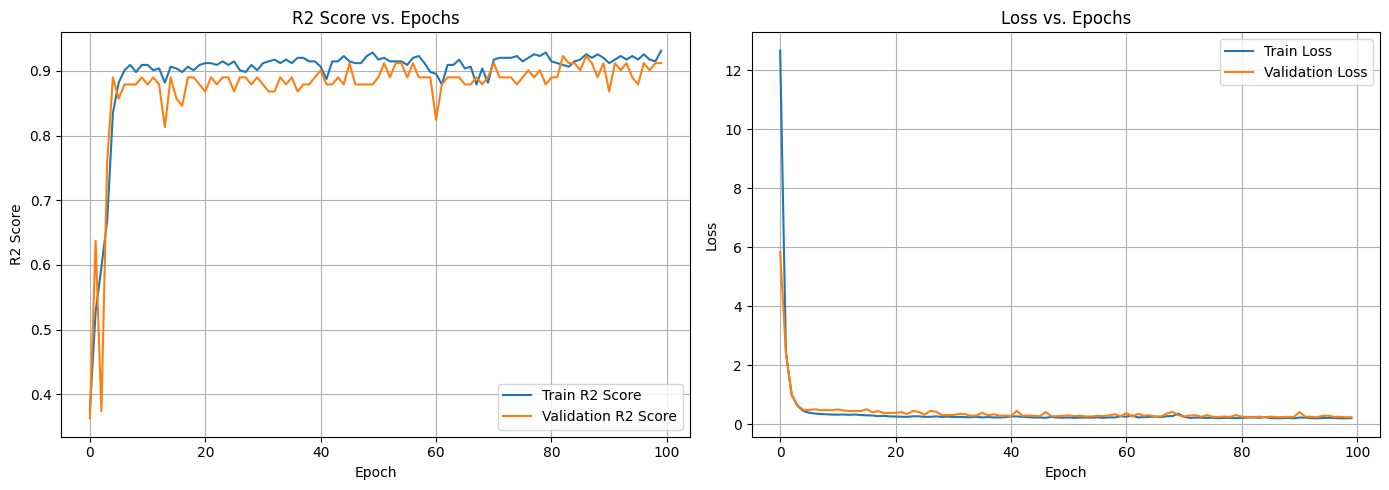

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Train R2 Score')
plt.plot(train.history['val_accuracy'], label='Validation R2 Score')
plt.title('R2 Score vs. Epochs')
plt.ylabel('R2 Score')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Buat grafik Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Train Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()